In [65]:
#!pip install imbalanced-learn


https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score,RocCurveDisplay
from sklearn.preprocessing import label_binarize
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE


In [67]:
df=pd.read_csv('train.csv')
dt=pd.read_csv('test.csv')

In [68]:

df.describe()

,ID,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,...,i3mag,Z3mag,Y3mag,J3mag,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr
count,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,...,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000
mean,24326.761297,157.413606,-0.926899,0.927316,21.326973,19.904223,18.887562,18.323593,18.201334,18.022149,...,19.761906,18.653363,18.347970,18.157934,17.918551,17.825652,6.305703,79.624646,54.505159,35.399251
std,14038.295072,66.388946,2.411410,0.489506,2.345232,2.289705,2.024082,1.809982,1.721633,1.670744,...,1.452674,1.593221,1.491726,1.445090,1.369574,1.218845,1276.789991,5791.337827,3410.995424,2979.311817
min,1.000000,34.125470,-6.703610,0.000000,13.892700,12.227100,11.396600,10.969100,10.928600,11.072900,...,14.761300,13.642800,13.425000,13.477500,13.198100,13.105300,-99.000000,-99.000000,-99.000000,-99.000000
25%,12181.500000,134.743538,-2.492215,1.000000,19.420125,18.024200,17.272875,16.900425,16.835100,16.690250,...,18.748725,17.464400,17.226850,17.041725,16.863900,16.873950,0.647672,0.660015,0.668280,0.618118
50%,24300.000000,181.789490,-0.412005,1.000000,21.274150,19.840850,18.795950,18.309800,18.234400,18.070100,...,19.796850,18.682700,18.401000,18.208550,17.979500,17.902300,0.917700,0.869215,0.858840,0.816180
75%,36480.750000,209.603552,0.824670,1.000000,23.108600,21.820800,20.461875,19.658450,19.499125,19.253375,...,20.993350,19.773800,19.433475,19.182475,18.844775,18.628375,1.434217,1.287025,1.258892,1.193870
max,48685.000000,225.441880,3.021730,2.000000,33.162300,36.154200,25.110400,36.184800,23.480000,22.858900,...,24.570800,23.511900,22.461000,22.576200,24.343000,21.743800,134608.831100,668970.396270,427925.236530,435077.487900


In [69]:
#Observamos que las ultimas 4 columnas tienen valores invalidos lo que puede generar problemas al modelo de entrenamiento
#remplazamos cada valor referido a esto
df.replace(-99,np.nan,inplace=True) #La función replace() es un método de Pandas que permite reemplazar valores específicos en un DataFrame o en una Serie.
#Ademas puede haber valores faltantes por lo que completamos eñ codigo con estos valores tomando la mediana de cada columna
df.fillna(df.median(),inplace=True) #es un método de Pandas que se utiliza para reemplazar los valores faltantes (NaN) en un DataFrame
df = df[(np.abs(zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

In [70]:
#Observamos que las ultimas 4 columnas tienen valores invalidos lo que puede generar problemas al modelo de entrenamiento
#remplazamos cada valor referido a esto
dt.replace(-99,np.nan,inplace=True)
#Ademas puede haber valores faltantes por lo que completamos eñ codigo con estos valores tomando la mediana de cada columna
dt.fillna(dt.mean(),inplace=True)
#Repito lo de arriba pues si entreno testeo


In [71]:
df.set_index('ID',inplace=True)
dt.set_index('ID',inplace=True )

In [72]:
df.describe()
#Observemos que la tabla cambio

,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,Jmag,...,i3mag,Z3mag,Y3mag,J3mag,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr
count,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,...,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000
mean,157.360796,-0.929178,0.928617,21.335616,19.921246,18.905479,18.340830,18.219830,18.040858,17.897774,...,19.775563,18.667906,18.362915,18.172680,17.932997,17.839259,1.187502,1.067709,1.046335,0.991587
std,66.447645,2.412967,0.489358,2.294431,2.253521,1.992963,1.777537,1.692167,1.641841,1.590443,...,1.429418,1.571144,1.468946,1.423578,1.348455,1.198915,0.670036,0.608891,0.687640,0.572283
min,34.125470,-6.703610,0.000000,14.933600,14.010000,13.410200,13.183300,13.290000,13.242000,13.200900,...,15.406500,14.082200,13.965200,13.998100,13.937100,14.187800,0.341090,0.232720,0.272110,0.305210
25%,134.679275,-2.496885,1.000000,19.438250,18.037500,17.286350,16.914100,16.848100,16.702000,16.595700,...,18.759850,17.477200,17.239700,17.055500,16.874400,16.888100,0.768925,0.695060,0.676735,0.645635
50%,181.800800,-0.412890,1.000000,21.285100,19.863400,18.810700,18.321600,18.246600,18.082400,17.937200,...,19.804000,18.690500,18.409500,18.216500,17.989800,17.909000,0.980705,0.883985,0.862190,0.828440
75%,209.710065,0.823405,1.000000,23.101350,21.819450,20.462100,19.659400,19.501050,19.254800,19.049300,...,20.992850,19.777000,19.435050,19.185600,18.847600,18.630900,1.430330,1.284630,1.253830,1.190005
max,225.441880,3.021730,2.000000,28.359000,26.698800,24.953900,23.645000,23.328600,22.858900,22.657800,...,23.935200,23.382200,22.461000,22.295300,21.908800,21.480300,23.131380,23.569090,57.702260,29.329210


In [73]:
#Ahora, como queremos que diferencie entre estrella, galaxia o cuasar, utilizamos las magnitudes
Bandas=['umag','gmag','rmag','imag','zmag','Ymag','Jmag','Hmag','Kmag','W1mag','W2mag'] #Estas solas magnitudes totales
#Elegimos en principio estas bandas 
#La función len() devuelve la cantidad de elementos en una lista
for i in range(len(Bandas)-1):
    df[f'{Bandas[i]}-{Bandas[i+1]}']=df[Bandas[i]]-df[Bandas[i+1]]
    dt[f'{Bandas[i]}-{Bandas[i+1]}']=dt[Bandas[i]]-dt[Bandas[i+1]]
Bandas_rad=['u3mag','g3mag','r3mag','i3mag','Z3mag','Y3mag','J3mag','H3mag','K3mag']
#Ahora en la misma linea de codigo, haremos lo mismo para las magnitudes a radio constante 3arcsecond
for i in range(len(Bandas_rad)-1):
    df[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=df[Bandas_rad[i]]-df[Bandas_rad[i+1]]
    dt[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=dt[Bandas_rad[i]]-dt[Bandas_rad[i+1]]
#Bandas_HLR=['Yhlr','Jhlr','Hhlr','Khlr']
#for i in range(len(Bandas_HLR)-1):
    #df[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=df[Bandas_HLR[i]]-df[Bandas_HLR[i+1]]
    #dt[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=dt[Bandas_HLR[i]]-dt[Bandas_HLR[i+1]]

df['W1mag/W2mag'] = df['W1mag'] / df['W2mag']
df['umag/gmag'] = df['umag'] / df['gmag']
df['gmag/rmag'] = df['gmag'] / df['rmag']
df['rmag/imag'] = df['rmag'] / df['imag']
df['Hmag/Kmag'] = df['Hmag'] / df['Kmag']
df['Jmag/Hmag'] = df['Jmag'] / df['Hmag']
dt['W1mag/W2mag'] = dt['W1mag'] / dt['W2mag']
dt['umag/gmag'] = dt['umag'] / dt['gmag']
dt['gmag/rmag'] = dt['gmag'] / dt['rmag']
dt['rmag/imag'] = dt['rmag'] / dt['imag']
dt['Hmag/Kmag'] = dt['Hmag'] / dt['Kmag']
dt['Jmag/Hmag'] = dt['Jmag'] / dt['Hmag']


In [74]:
df.describe()
#Observemos que la tabla cambio

,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,Jmag,...,Z3mag-Y3mag,Y3mag-J3mag,J3mag-H3mag,H3mag-K3mag,W1mag/W2mag,umag/gmag,gmag/rmag,rmag/imag,Hmag/Kmag,Jmag/Hmag
count,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,...,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000
mean,157.360796,-0.929178,0.928617,21.335616,19.921246,18.905479,18.340830,18.219830,18.040858,17.897774,...,0.304991,0.190235,0.239683,0.093738,0.977774,1.072482,1.053145,1.030061,1.004730,1.012443
std,66.447645,2.412967,0.489358,2.294431,2.253521,1.992963,1.777537,1.692167,1.641841,1.590443,...,0.221876,0.175274,0.220545,0.281057,0.018161,0.041854,0.026710,0.017572,0.016995,0.013448
min,34.125470,-6.703610,0.000000,14.933600,14.010000,13.410200,13.183300,13.290000,13.242000,13.200900,...,-1.191600,-1.233000,-2.058400,-2.527300,0.890621,0.798113,0.934201,0.732472,0.864715,0.834118
25%,134.679275,-2.496885,1.000000,19.438250,18.037500,17.286350,16.914100,16.848100,16.702000,16.595700,...,0.209000,0.108850,0.148700,-0.064300,0.967520,1.042581,1.033406,1.019117,0.994440,1.006435
50%,181.800800,-0.412890,1.000000,21.285100,19.863400,18.810700,18.321600,18.246600,18.082400,17.937200,...,0.280500,0.228200,0.245700,0.174300,0.974803,1.071859,1.054640,1.027736,1.008507,1.013747
75%,209.710065,0.823405,1.000000,23.101350,21.819450,20.462100,19.659400,19.501050,19.254800,19.049300,...,0.379700,0.292100,0.363100,0.287400,0.981527,1.100213,1.073594,1.041920,1.016386,1.019644
max,225.441880,3.021730,2.000000,28.359000,26.698800,24.953900,23.645000,23.328600,22.858900,22.657800,...,2.008600,1.601500,2.183100,2.029900,1.088578,1.407790,1.331557,1.198456,1.171118,1.337453


In [75]:
dt.describe()

,RAdeg,DEdeg,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,...,Z3mag-Y3mag,Y3mag-J3mag,J3mag-H3mag,H3mag-K3mag,W1mag/W2mag,umag/gmag,gmag/rmag,rmag/imag,Hmag/Kmag,Jmag/Hmag
count,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,...,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000
mean,156.613149,-0.941329,21.333312,19.913324,18.893525,18.327183,18.208126,18.026394,17.881192,17.659919,...,0.305605,0.192101,0.239469,0.096717,0.977514,1.072817,1.053366,1.030131,1.004819,1.012373
std,66.636595,2.417208,2.355041,2.302595,2.033262,1.810993,1.725643,1.675016,1.618450,1.549947,...,0.222214,0.176534,0.224497,0.282231,0.018299,0.042910,0.027836,0.017916,0.017155,0.013767
min,34.123260,-6.700990,13.861100,12.374600,11.549300,11.126800,11.208200,11.035000,10.942100,10.770100,...,-1.170800,-0.815300,-1.746000,-1.700100,0.920631,0.577041,0.941978,0.804430,0.895952,0.875937
25%,134.302335,-2.524500,19.424800,18.030150,17.282600,16.900775,16.844400,16.705425,16.596125,16.427375,...,0.208300,0.109975,0.147175,-0.061700,0.967268,1.042811,1.033624,1.019093,0.994505,1.006117
50%,181.503560,-0.412735,21.304150,19.871000,18.812250,18.338150,18.252150,18.078800,17.940700,17.737750,...,0.281600,0.228700,0.247450,0.177400,0.974650,1.072000,1.054756,1.027876,1.008780,1.013790
75%,208.548822,0.809577,23.142750,21.828300,20.471850,19.660875,19.498025,19.268400,19.047425,18.729200,...,0.389225,0.294425,0.367200,0.289600,0.981540,1.099816,1.073481,1.042055,1.016554,1.019723
max,225.442140,3.019600,30.413400,36.653700,24.895600,23.483300,23.368500,22.731200,22.694700,22.810600,...,1.979400,2.281200,1.696400,2.481100,1.081902,1.569999,1.977924,1.174576,1.173148,1.121660


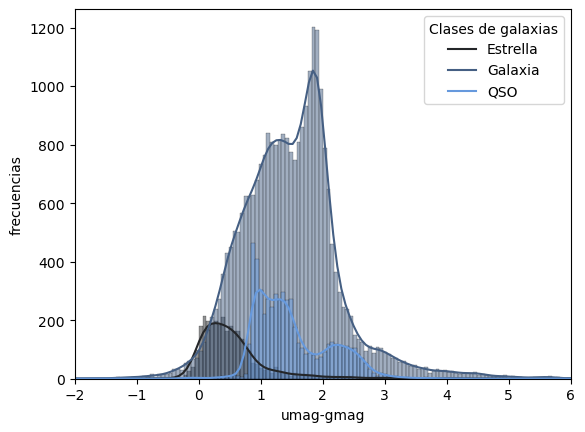

In [76]:
palette=sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.histplot(df, x='umag-gmag', hue='Hclass', kde=True, palette=palette)  
plt.xlim(-2,6)
plt.ylabel('frecuencias')

plt.legend(title='Clases de galaxias', labels=['Estrella', 'Galaxia', 'QSO'])
plt.show()

In [77]:
df['Hclass'].value_counts()

Hclass
1    27325
0     5714
2     3132
Name: count, dtype: int64

In [78]:
#Tengo que definir mis feature, mis variables de entrada, estas son las que utilizamos para entrenar el modelo
#features = ['umag', 'gmag', 'rmag', 'imag', 'zmag', 'Ymag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 
#            'umag-gmag', 'gmag-rmag', 'rmag-imag', 'imag-zmag', 'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 
#            'Hmag-Kmag', 'W1mag-W2mag', 'g3mag-r3mag', 'r3mag-i3mag', 
#            'i3mag-Z3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag', 'J3mag-H3mag', 'H3mag-K3mag']
#Me quedo con mis mejores estimadores
features = [
            'umag-gmag', 'gmag-rmag', 'rmag-imag', 'Ymag-Jmag', 'Jmag-Hmag', 
            'Hmag-Kmag', 'W1mag-W2mag', 'g3mag-r3mag', 'r3mag-i3mag',
             'Z3mag-Y3mag', 'Y3mag-J3mag', 'J3mag-H3mag', 'H3mag-K3mag','W1mag/W2mag', 'umag/gmag', 'gmag/rmag', 'rmag/imag', 'Hmag/Kmag', 'Jmag/Hmag']

In [79]:
df_tr, df_te=train_test_split(df,test_size=0.3,random_state=42)
#Divide el conjunto de datos en entrenamiento (70%) y prueba (30%)

In [80]:
#Ahora dividimos en clases de entrenamiento
X_train = df_tr[features]
y_train = df_tr['Hclass']

#lo mismo con el testeo
X_test=df_te[features]
y_test=df_te['Hclass']

In [81]:
model=RandomForestClassifier()

In [82]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
y_pred=model.predict(X_test)
print("Predicciones:", y_pred)

Predicciones: [1 1 0 ... 1 2 1]


In [84]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1693   24    6]
 [   8 8169   55]
 [   1   90  806]]


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1723
           1       0.99      0.99      0.99      8232
           2       0.93      0.90      0.91       897

    accuracy                           0.98     10852
   macro avg       0.97      0.96      0.96     10852
weighted avg       0.98      0.98      0.98     10852



In [86]:
f1_score(y_test,y_pred,average='weighted')

0.9829396625462704

In [87]:
#Tengo que volver a preparar el conjunto submit
df_submit=pd.read_csv('test.csv')
df_submit.set_index('ID',inplace=True)

In [88]:

Bandas=['umag','gmag','rmag','imag','zmag','Ymag','Jmag','Hmag','Kmag','W1mag','W2mag'] #Estas solas magnitudes totales
#Elegimos en principio estas bandas 
#La función len() devuelve la cantidad de elementos en una lista
for i in range(len(Bandas)-1):
    df_submit[f'{Bandas[i]}-{Bandas[i+1]}']=df_submit[Bandas[i]]-df_submit[Bandas[i+1]]
    #dt[f'{Bandas[i]}-{Bandas[i+1]}']=dt[Bandas[i]]-dt[Bandas[i+1]]
Bandas_rad=['u3mag','g3mag','r3mag','i3mag','Z3mag','Y3mag','J3mag','H3mag','K3mag']
#Ahora en la misma linea de codigo, haremos lo mismo para las magnitudes a radio constante 3arcsecond
for i in range(len(Bandas_rad)-1):
    df_submit[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=df_submit[Bandas_rad[i]]-df_submit[Bandas_rad[i+1]]
    #dt[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=dt[Bandas_rad[i]]-dt[Bandas_rad[i+1]]
Bandas_HLR=['Yhlr','Jhlr','Hhlr','Khlr']
for i in range(len(Bandas_HLR)-1):
    df_submit[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=df_submit[Bandas_HLR[i]]-df[Bandas_HLR[i+1]]
    #dt[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=dt[Bandas_HLR[i]]-dt[Bandas_HLR[i+1]]
df_submit['W1mag/W2mag'] = df_submit['W1mag'] / df_submit['W2mag']
df_submit['umag/gmag'] = df_submit['umag'] / df_submit['gmag']
df_submit['gmag/rmag'] = df_submit['gmag'] / df_submit['rmag']
df_submit['rmag/imag'] = df_submit['rmag'] / df_submit['imag']
df_submit['Hmag/Kmag'] = df_submit['Hmag'] / df_submit['Kmag']
df_submit['Jmag/Hmag'] = df_submit['Jmag'] / df_submit['Hmag']




In [89]:
print(df_tr.columns)  # estas son las que uso para entrenar
print(df_submit.columns)  #Con esto imprimo las columnas del submir

Index(['RAdeg', 'DEdeg', 'Hclass', 'umag', 'gmag', 'rmag', 'imag', 'zmag',
       'Ymag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'u3mag', 'g3mag',
       'r3mag', 'i3mag', 'Z3mag', 'Y3mag', 'J3mag', 'H3mag', 'K3mag', 'Yhlr',
       'Jhlr', 'Hhlr', 'Khlr', 'umag-gmag', 'gmag-rmag', 'rmag-imag',
       'imag-zmag', 'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 'Hmag-Kmag',
       'Kmag-W1mag', 'W1mag-W2mag', 'u3mag-g3mag', 'g3mag-r3mag',
       'r3mag-i3mag', 'i3mag-Z3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag',
       'J3mag-H3mag', 'H3mag-K3mag', 'W1mag/W2mag', 'umag/gmag', 'gmag/rmag',
       'rmag/imag', 'Hmag/Kmag', 'Jmag/Hmag'],
      dtype='object')
Index(['RAdeg', 'DEdeg', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'Ymag',
       'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'u3mag', 'g3mag', 'r3mag',
       'i3mag', 'Z3mag', 'Y3mag', 'J3mag', 'H3mag', 'K3mag', 'Yhlr', 'Jhlr',
       'Hhlr', 'Khlr', 'umag-gmag', 'gmag-rmag', 'rmag-imag', 'imag-zmag',
       'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 'Hm

In [90]:
df_submit = df_submit[features]


In [91]:
prediction=model.predict(df_submit)

In [92]:
df_submit['Hclass']=prediction

In [93]:
df_submit.loc[:,['Hclass']].to_csv('submission.csv',index=True) #Este es el que queremos subir a la competencia
#Ahora deberia andar, creo

In [94]:
#param_grid={
#    #'n_estimators':[50,100,150,200,300], #El número de árboles en el bosque. Aumentar este número puede mejorar el rendimiento, pero a costa de mayor tiempo de entrenamiento.
#    'max_depth':[3,5,10], #La profundidad máxima de los árboles. Limitar la profundidad puede evitar el sobreajuste
#    'min_samples_split':[2,5,10] #podriamos agregar esto ademas #El número mínimo de muestras requeridas para dividir un nodo.
#    }
param_grid = {
    'n_estimators': [450,550,600],
    'max_depth': [30,35,40],
    'min_samples_split': [2,5,6],
    'min_samples_leaf': [1,2,4],
}

In [95]:
#model=GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring='f1_weighted') 
#model=RandomizedSearchCV(RandomForestClassifier(),param_grid,n_iter=20,cv=5,scoring='f1_weighted',n_jobs=-1) 
model=GridSearchCV(RandomForestClassifier(),param_grid,cv=2,scoring='f1_weighted',n_jobs=-1) 

#Realiza una búsqueda aleatoria de combinaciones de parámetros, lo que puede ser más eficiente cuando tienes muchos hiperparámetros.

In [96]:
model.fit(X_train,y_train)


/home/camila/miniconda3/envs/astrometria/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [30, 35, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 6],
                         'n_estimators': [450, 550, 600]},
             scoring='f1_weighted')

In [97]:
model.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 550}

In [98]:
model.best_score_


0.9809631067411608

In [99]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1693   24    6]
 [   8 8169   55]
 [   1   90  806]]


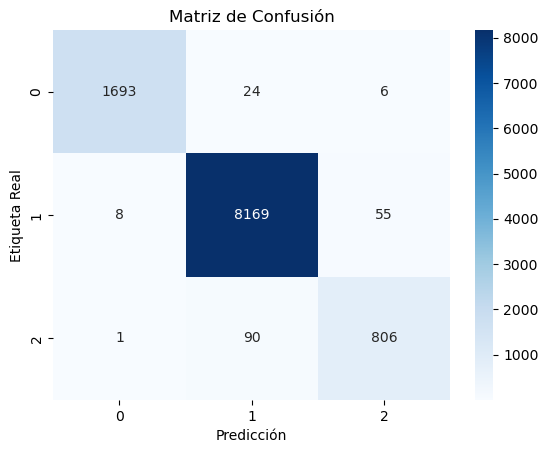

In [100]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

In [101]:
y_pred=model.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.9827445917231468

In [102]:
y_pred = model.predict(X_test) #métrica de evaluación que mide la proporción de predicciones correctas que realiza un modelo sobre el total de predicciones
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.9828603022484335


In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1723
           1       0.99      0.99      0.99      8232
           2       0.93      0.90      0.91       897

    accuracy                           0.98     10852
   macro avg       0.97      0.96      0.96     10852
weighted avg       0.98      0.98      0.98     10852



In [104]:
y_prob = model.predict_proba(X_test)

In [105]:
model.best_estimator_.feature_importances_

array([0.02357279, 0.03537049, 0.06398705, 0.00512953, 0.02039923,
       0.05315811, 0.05716815, 0.03211842, 0.08573794, 0.04393372,
       0.03028661, 0.11653692, 0.17086968, 0.06205775, 0.02052893,
       0.04279636, 0.06008949, 0.05145897, 0.02479986])

In [106]:
print(features)

['umag-gmag', 'gmag-rmag', 'rmag-imag', 'Ymag-Jmag', 'Jmag-Hmag', 'Hmag-Kmag', 'W1mag-W2mag', 'g3mag-r3mag', 'r3mag-i3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag', 'J3mag-H3mag', 'H3mag-K3mag', 'W1mag/W2mag', 'umag/gmag', 'gmag/rmag', 'rmag/imag', 'Hmag/Kmag', 'Jmag/Hmag']


In [107]:
y_prob = model.predict_proba(X_test)

In [108]:
model.best_estimator_.feature_importances_

array([0.02357279, 0.03537049, 0.06398705, 0.00512953, 0.02039923,
       0.05315811, 0.05716815, 0.03211842, 0.08573794, 0.04393372,
       0.03028661, 0.11653692, 0.17086968, 0.06205775, 0.02052893,
       0.04279636, 0.06008949, 0.05145897, 0.02479986])

In [109]:
i=np.argsort(model.best_estimator_.feature_importances_)
for a in i:
    print(features[a],model.best_estimator_.feature_importances_[a])

Ymag-Jmag 0.005129527730507434
Jmag-Hmag 0.020399225496076524
umag/gmag 0.020528929462994235
umag-gmag 0.023572794933053094
Jmag/Hmag 0.024799861843832146
Y3mag-J3mag 0.030286607090188555
g3mag-r3mag 0.032118415894663806
gmag-rmag 0.035370494997191866
gmag/rmag 0.04279635850536266
Z3mag-Y3mag 0.04393372024073813
Hmag/Kmag 0.05145896848211013
Hmag-Kmag 0.05315811059954565
W1mag-W2mag 0.05716815494811818
rmag/imag 0.06008949438301901
W1mag/W2mag 0.06205774800704068
rmag-imag 0.06398704577213145
r3mag-i3mag 0.08573794184437827
J3mag-H3mag 0.11653691873718156
H3mag-K3mag 0.17086968103186648


In [114]:

best_model = RandomForestClassifier(
    max_depth=45, 
    n_estimators=400, 
    min_samples_split=2, 
    min_samples_leaf=1,
    max_features="sqrt",  # O también puedes probar con "log2"
    class_weight='balanced'
)
best_model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', max_depth=45, n_estimators=400)

In [115]:
y_pred = best_model.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1723
           1       0.99      0.99      0.99      8232
           2       0.94      0.90      0.92       897

    accuracy                           0.98     10852
   macro avg       0.97      0.96      0.96     10852
weighted avg       0.98      0.98      0.98     10852



In [117]:
f1_score(y_test,y_pred,average='weighted')

0.9830007163237452